# Natural Language Processing and Sentiment Analysis

## Natural Language Processing

First, think about C3PO, Luke Skywalker's robot sidekick in Star Wars. C3P0 is a fantasized version of human-computer interaction in the distant future. However, humans interacting with machines is an every day reality for us. Your home or car smart assistant (Alexa), customer service on websites or phone lines, autocorrect features, etc. are all examples of Natural Language Processing.

Natural Language Processing (NLP) is the field of deriving meaningful information from human speech. NLP is a branch of computer science, or more specifically a branch of artificial intelligence, concerned with allowing computers the ability to understand human speech either in a written or spoken format. 






## NLP can be used for many purposes
There are many different varieties of natural language processing. These are just a few real world examples of these techniques to give an idea of how this is used today.

#### Sentiment Analysis
This is most of what we will be doing today. Sentiment analysis examines text in order to identify the general "feeling" of the text. Take this example...
Businesses are using sentiment analysis today to monitor and evaluate customer service. Does this customer seem satisfied?

![airbnb tweet](./images/airbnb.png)

This person is not happy. By analyzing sentiment analysis on customer support chats, tweets, etc. a company can get insights on where their service model is not working. 
    
#### Topic Modeling
Topic modeling is an unsupervised machine learning technique that is capable of scanning a set of documents, detecting patterns within them, and automatically clustering word groups or similar expressions that characterize the documents.  An example...
Imagine that you work at a legal firm and someone at a company has embezzled money. You need to figure out who that person is and you are monitoring company emails from the last six months. There are probably thousands of emails and you don't want to waste time reading all of them. In this case, you can have a computer read the text of the emails and identify the ones that are relevant to the topic of money, narrowing down the amount of emails needed to read
    
![email examples](./images/topicmodeling.png)
    
#### Text Generation
Text generation is simply the task of producing new text. A very common example of this is autocomplete or autofill features, such as when texting or in a search engine. Take the following example, we all use this every day right?

![google autofill](./images/google.png)

The code simple predicts what you might type next...

## Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk     #natural language toolkit

### Import Sample Data from NLTK

For starters, we will use some sample data that I am providing to you. This is data from Amazon.com for product reviews.

In [2]:
data = pd.read_csv('/Users/ep9k/Desktop/sentiment_analysis/Reviews.csv')

In [ ]:
print(data)

Let's see the text of just the first row of the dataset

In [3]:
# show the text of just the first review
print(data['Text'][0])


I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


Here you can see the size and shape of the test data. There are over 500,000 reviews in this dataset so let's make it smaller, just for our the purposes of our workshop today.

In [4]:
data.shape

(568454, 10)

In [5]:
# I am simplifying the dataset to just the first 500 reviews
data = data.head(500)

# Exploratory Data Analysis (EDA)
Let's play with the data to see what is in it. There are a lot of reasons for doing this.

Products have a score of 1-5. Let's see how many times each score occurs

In [6]:
data['Score'].value_counts()

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

Let's use Matplotlib to visualize the data in a plot

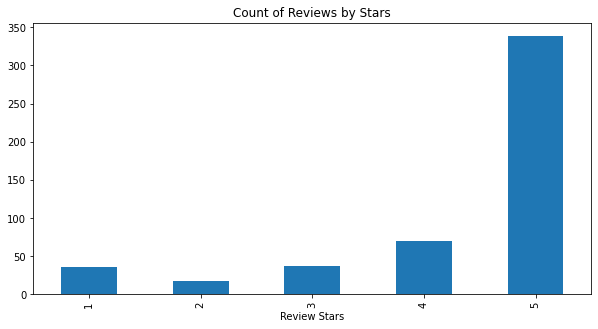

In [7]:
ax = data['Score'].value_counts().sort_index().plot(kind='bar',
                                title='Count of Reviews by Stars',
                                figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

# NLTK Basics

In [8]:
example_text = data['Text'][50]
print(example_text)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


## Tokenization

NLTK allows tokenization out of the box with word_tokenize(). However, it is a little bit messy

In [9]:
tokens = nltk.word_tokenize(example_text)
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


## Part of Speech
We can find the part of speech for each token. [Here](https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/) is a (complete?) list of NLTK's parts of speech. 

In [10]:
tagged = nltk.pos_tag(tokens)

## VADER Sentiment Scoring
VADER - Valence Aware Dictionary for sEntiment Reasoning. VADER is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity of emotion. This model does not account for relationships between words. This is the "bag of word" approach. All words in the text are thrown into a bag and scored. The cumulative score determines the final rating.

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [12]:
sia = SentimentIntensityAnalyzer()

A few quick examples of the Sentiment Intensity Analyzer in action.

In [13]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

The compound score has a range of values from -1 to +1 to rate how positive (+1) or negative (-1) a statement is. 

In [14]:
sia.polarity_scores('This is the worst!')

{'neg': 0.594, 'neu': 0.406, 'pos': 0.0, 'compound': -0.6588}

Now let's run this on our example text from earlier

In [15]:
print(example_text)
sia.polarity_scores(example_text)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

Now let's run it on our entire dataset

In [16]:
results = {}

for i, row in data.iterrows():
    text = row['Text']
    myId = row['Id']
    results[myId] = sia.polarity_scores(text)
    

In [17]:
vaders = pd.DataFrame(results).T

#this line sets the index column and calls it 'id'
vaders = vaders.reset_index().rename(columns={'index':'Id'})    

vaders


,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


Now let's merge our vaders sentiment scores with our original dataframe. Now we have sentiment score and metadata added to our original data. 

In [18]:
#it is actually very easy to do
data = data.merge(vaders, how='left')

data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


### Testing Assumptions

Let's now test some of our assumptions. I would assume that if a reviewer gave a product a 5 star review, then the text would have a positive sentiment. Accordingly, a one star review would have text with a negative sentiment. 

In [ ]:
#overall compound score of each review
ax = sns.barplot(data=data, x='Score', y='compound', ci=None)  #ci is for the confidence interval
ax.set_title('Compound Score by Amazon Stars')
plt.show()

In [ ]:
#positive sentiment score of each review
ax = sns.barplot(data=data, x='Score', y='pos', ci=None)

In [ ]:
#negative sentiment score of each review
ax = sns.barplot(data=data, x='Score', y='neg', ci=None)

In [ ]:
# or you could be fancy and do them together in one plot

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
sns.barplot(data=data, x='Score', y='pos', ax=axs[0], ci=None)
sns.barplot(data=data, x='Score', y='neg', ax=axs[1], ci=None)
axs[0].set_title('Positive')
axs[1].set_title('Negative')
plt.show()

## Example 2: TextBlob. A rules-based approach to scoring sentiment

TextBlob is a library built on top of nltk. It provides some additional functionality such as rules-based sentiment scores. 

In [101]:
from textblob import TextBlob

example1 = TextBlob("I love winter").sentiment

#again, polarity is measured between -1 and 1
#subjectivity is measured between 0 and 1. This is a measure of how opinionated you are about something. 
example1

Sentiment(polarity=0.5, subjectivity=0.6)

### More about this module

Linguist [Tom De Smedt](https://scholar.google.com/citations?user=8VBuRDwAAAAJ&hl=cs) has manually labeled all words in the english language ([from WordNet](https://wordnet.princeton.edu/)) their sentiment as "positive", "negative", etc. Let's take the word 'great' as an example.  

![Great lexicon](./images/great.png)

In [103]:
print(TextBlob("great").sentiment) 

Sentiment(polarity=0.8, subjectivity=0.75)


Because "great" has several meanings, how do we know which one to use and which polarity/subjectivity score to assign to this word?  TextBlob gets the results above by just averaging all the polarity and subjectivity scores of the potential uses of "great"

In [104]:
print(TextBlob("not great").sentiment) 

Sentiment(polarity=-0.4, subjectivity=0.75)


"Not great" has a polarity score of -0.4, while the subjectivity remains unchanged. In this case, when TextBlob sees 'not' in front of something, it multiplies the polarity score of that word by -0.5. 

In [105]:
print(TextBlob("very great").sentiment) 

Sentiment(polarity=1.0, subjectivity=0.9750000000000001)


If a word is preceeded by "very", both the sentiment and subjectivity scores are multiplied by 1.3, with a cap score of 1. 

In [108]:
print(TextBlob("I am great.").sentiment) 

Sentiment(polarity=0.8, subjectivity=0.75)


"I am great" has the same score as our first example, because "I" and "am" do not affect "great". 

In [109]:
print(TextBlob("I am great!").sentiment)

Sentiment(polarity=1.0, subjectivity=0.75)


Punctuation also affects the scores. Here you see an "!" increases the polarity (though I do not know by how much)"

### TextBlob Summary
TextBlob finds all of the words and phrases that it can assign a polarity and subjectivity to and averages them all together to get final scores. 

In [43]:
# read in text of Harry Potter: The Sorcerer's Stone
harry_potter1 = open('/Users/ep9k/Desktop/SentimentAnalysis_NLP-main/HarryPotterPhilosophersStone.txt','r').read()
harry_potter2 = open('/Users/ep9k/Desktop/SentimentAnalysis_NLP-main/HarryPotterChamberOfSecrets.txt','r').read()
harry_potter3 = open('/Users/ep9k/Desktop/SentimentAnalysis_NLP-main/HarryPotterPrisonerOfAzkaban.txt','r').read()

book_texts = [harry_potter1, harry_potter2, harry_potter3]

book_names = ["Sorceror's Stone", "Chamber of Secrets", "Prisoner of Azkaban"]

In [62]:
book_data = {}

for i, book in enumerate(book_names):
    book_data[book] = book_texts[i]
    
# create pandas dataframe with this data
data_df = pd.DataFrame(book_data.items(), columns=['BookName', 'BookText'])


### Cleaning the data

Common data cleaning steps on all text:

Make text all lower case
Remove punctuation
Remove numerical values
Remove common non-sensical text (/n)
Tokenize text
Remove stop words

In [63]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

harry_potter_df = pd.DataFrame(data_df.BookText.apply(round1))

In [64]:
harry_potter_df

,BookText
0,the boy who lived mr and mrs dursley of numbe...
1,j k r o w l n g harry potter the worst bir...
2,owl post harry potter was a highly unusual bo...


## Document-Term Matrix
For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [72]:
# we will create a document-term matrix using CountVectorizer and exclude common English stop words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(harry_potter_df['BookText'])
harry_potter_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
harry_potter_dtm.index = ["Sorceror's Stone", "Chamber of Secrets", "Prisoner of Azkaban"]
harry_potter_dtm

,aaaaaaaaaaaaaarrrrrrrrrrrrggggghhhhh,aaaaaaaaaaargh,aaaaaaarrrgh,aaaaarrrgh,aaaargh,aaah,aaargh,aah,aargh,aback,...,zap,zero,zigzagged,zigzagging,zombie,zonko,zoo,zoom,zoomed,zooming
Sorceror's Stone,0,1,0,1,1,1,0,0,1,1,...,0,0,0,2,2,0,7,1,1,2
Chamber of Secrets,0,0,0,0,0,0,1,0,0,0,...,1,1,1,1,0,0,2,0,2,0
Prisoner of Azkaban,1,0,1,0,0,0,1,1,0,2,...,0,3,0,0,1,11,0,0,9,3


## Sentiment of Routine

In [74]:
!conda install -c conda-forge textblob

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [79]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

harry_potter_df['polarity'] = harry_potter_df['BookText'].apply(pol)
harry_potter_df['subjectivity'] = harry_potter_df['BookText'].apply(sub)

harry_potter_df

,BookText,polarity,subjectivity
0,the boy who lived mr and mrs dursley of numbe...,0.049472,0.475820
1,j k r o w l n g harry potter the worst bir...,0.044548,0.494058
2,owl post harry potter was a highly unusual bo...,0.032671,0.485666


## Sentiment of Routine over Time

Most Storylines have an arc. What is the arc of the Harry Potter books?

In [ ]:
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in harry_potter_df.BookText:
    split = split_text(t)
    list_pieces.append(split)
    


In [86]:
len(list_pieces)

3

In [87]:
len(list_pieces[0])

10

In [88]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.03670946026450614,
  0.008320715062012525,
  0.09166974954081406,
  0.06460785453862376,
  0.03809108297371207,
  0.06641762351813899,
  0.05199167580255241,
  0.035379484409539065,
  0.044295234291095185,
  0.05400896297372071],
 [0.0563743847038778,
  0.06885438689217759,
  0.05510049167318188,
  0.07909284354936541,
  0.036390349437559734,
  0.011205687254319462,
  0.03650850755873589,
  0.014827570772600888,
  0.018685277737244026,
  0.06477400250585737],
 [0.046497764754807026,
  0.040658972525945046,
  0.05168185124568106,
  0.05152927553597207,
  -0.007709417818113483,
  0.07915983750773957,
  0.01682790602579828,
  -0.012019821608091745,
  -0.010228779017104507,
  0.06584754250096553]]

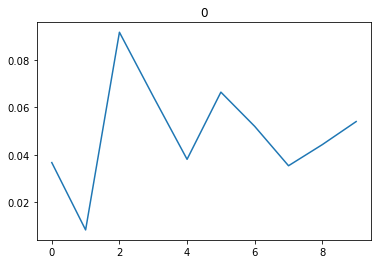

In [95]:
# Show the plot for one book
harry_potter_df['BookTitle'] = ["Sorceror's Stone", "Chamber of Secrets", "Prisoner of Azkaban"]

plt.plot(polarity_transcript[0])
plt.title(harry_potter_df['BookTitle'].index[0])
plt.show()